In [ ]:
# imports
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction import text 

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# importing our data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE/Data/bert_pub.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing our data again in a different format
pub_list = ['buzzfeednews', 'cnn', 'vox', 'atlantic', 'guardian', 'washingtonpost', 'newyorktimes', 'npr', 'reuters', 'newyorkpost', 'foxnews', 'nationalreview', 'breitbart']

data_dict = {}
for i in pub_list:
    data_dict[i] = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/CAPSTONE/Data/{i}.csv')
    data_dict[i] = data_dict[i].loc[data_dict[i]['title'].isnull() != 1]


In [ ]:
# function to get the average of a column based on a specific keyword

def avg_search_col(data, name, col1, col2):
    search = {}
    for i in data:
        search[i] = np.average(data[i][data[i][col1].str.contains(name)][col2])
    return search

# function to get average of a column
def avg_col(data, col1):
    search = {}
    for i in data:
        search[i] = np.average(data[i][col1])
    return search

# funciton to plot a dictionary 
def plot_dict(data, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.barh(list(data.keys()),list(data.values()))
    plt.title(title)
    plt.show()
    

In [ ]:
#function that plots our dictionary of dictionaries

def plot_loop(data_dict):
    
    for i in data_dict:
        plt.figure(figsize=(5,5))
        cvec = CountVectorizer(stop_words = 'english')

        cvec.fit(data_dict[i]['title'])

        X = cvec.transform(data_dict[i]['title'])

        X_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names())
        top_df = X_df.sum().sort_values(ascending = False).head(10)

        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.barh(top_df.index,top_df.values)
        plt.title(i)
        plt.show()

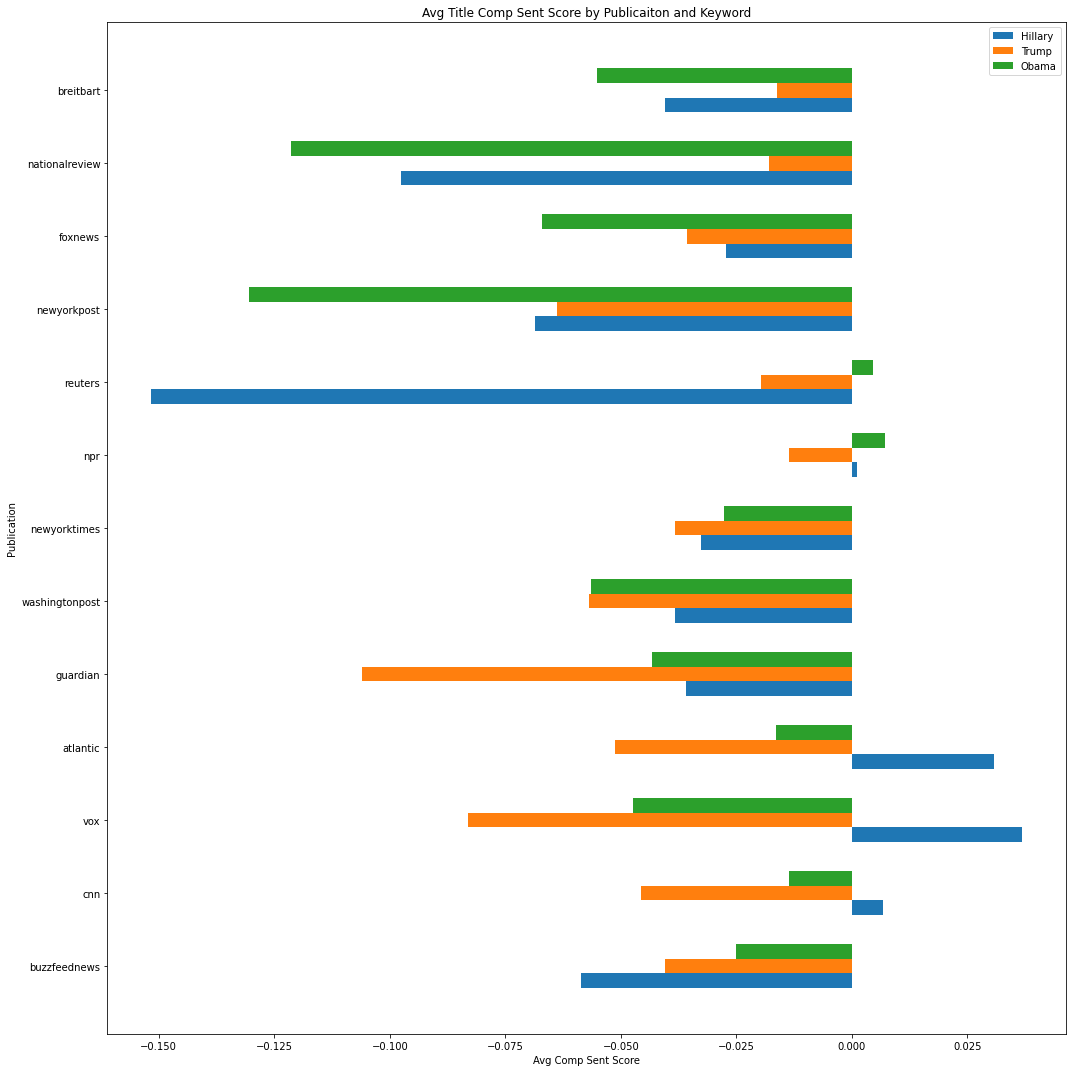

In [ ]:
# getting avg headline composite sentiment scores for each publication 
avg_hil_comp = avg_search_col(data_dict, 'Hillary', 'title', 'comp_t')
avg_tru_comp = avg_search_col(data_dict, 'Trump', 'title', 'comp_t')
avg_ob_comp = avg_search_col(data_dict, 'Obama', 'title', 'comp_t')

# creating values for our figure
labels = list(avg_hil_comp.keys())
y = np.arange(len(list(avg_hil_comp.keys())))
height = .2

# creating figure
fig, ax = plt.subplots(figsize = (15,15))

ax.barh(y - height, list(avg_hil_comp.values()), height, label='Hillary')
ax.barh(y , list(avg_tru_comp.values()), height, label='Trump')
ax.barh(y + height, list(avg_ob_comp.values()), height, label='Obama')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Publication')
ax.set_xlabel('Avg Comp Sent Score')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.set_title('Avg Title Comp Sent Score by Publicaiton and Keyword')
ax.legend()

fig.tight_layout()
plt.show()

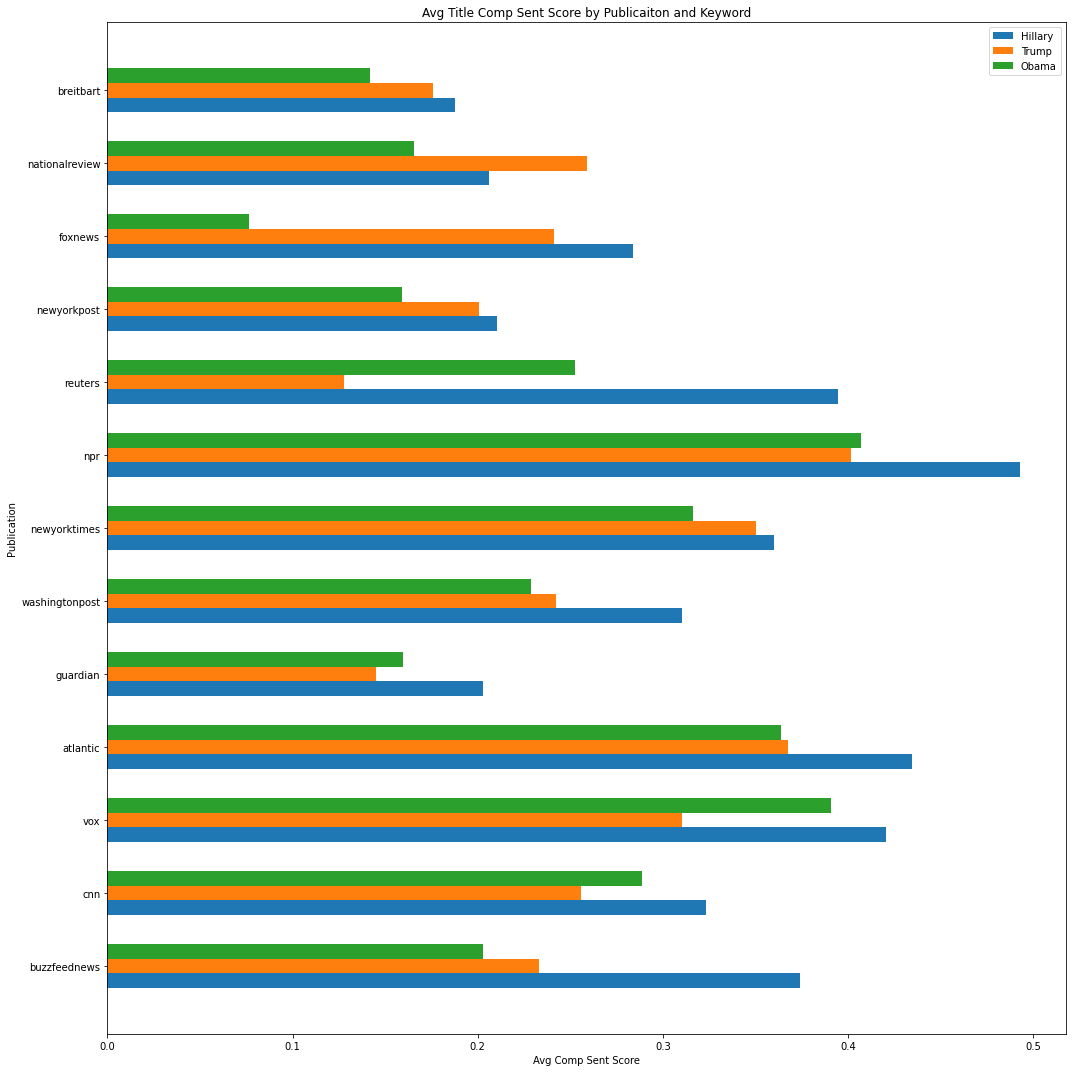

In [ ]:
# getting avg article composite sentiment scores for each publication 
avg_hil_comp_c = avg_search_col(data_dict, 'Hillary', 'content', 'comp_c')
avg_tru_comp_c = avg_search_col(data_dict, 'Trump', 'content', 'comp_c')
avg_ob_comp_c = avg_search_col(data_dict, 'Obama', 'content', 'comp_c')

labels = list(avg_hil_comp_c.keys())
y = np.arange(len(list(avg_hil_comp_c.keys())))
height = .2


fig, ax = plt.subplots(figsize = (15,15))

ax.barh(y - height, list(avg_hil_comp_c.values()), height, label='Hillary')
ax.barh(y , list(avg_tru_comp_c.values()), height, label='Trump')
ax.barh(y + height, list(avg_ob_comp_c.values()), height, label='Obama')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Publication')
ax.set_xlabel('Avg Comp Sent Score')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.set_title('Avg Title Comp Sent Score by Publicaiton and Keyword')
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
# getting avg col for the three sentiment scores
comp_c = avg_col(data_dict, 'comp_c')
comp_t = avg_col(data_dict, 'comp_t')
neg_c = avg_col(data_dict, 'neg_c')
neg_t = avg_col(data_dict, 'neg_t')
pos_c = avg_col(data_dict, 'pos_c')
pos_t = avg_col(data_dict, 'pos_t')

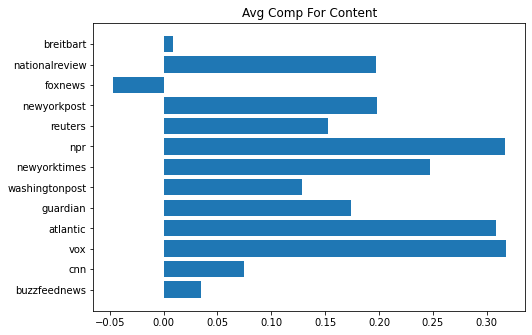

In [ ]:
plot_dict(comp_c, 'Avg Comp For Article')

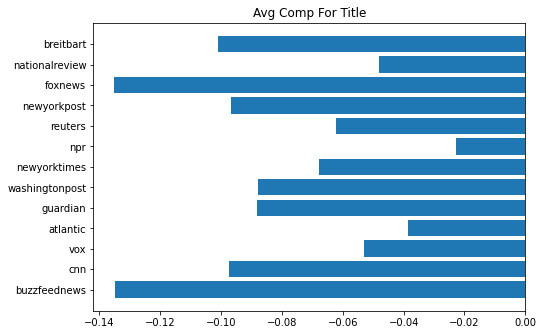

In [ ]:
plot_dict(comp_t, 'Avg Comp For Headline')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

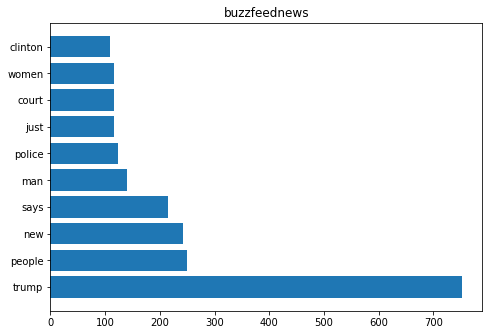

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

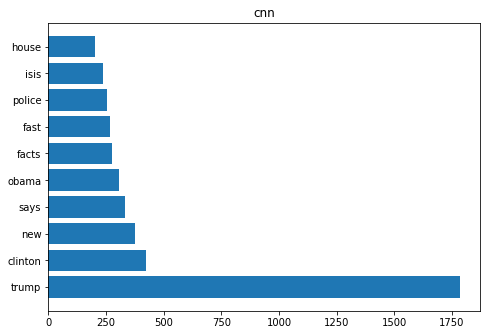

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

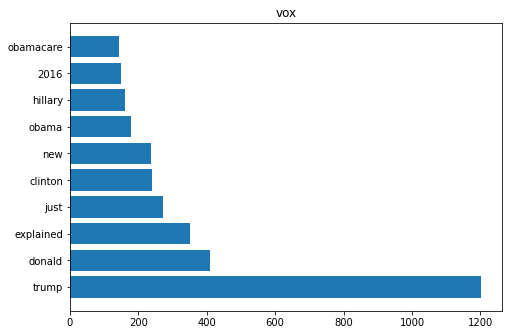

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

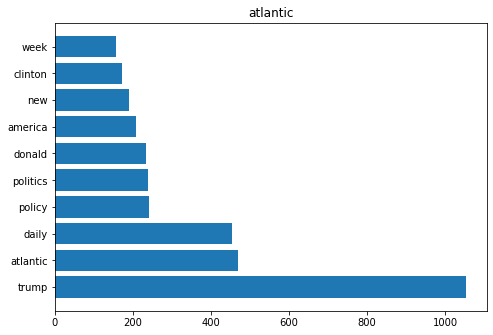

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

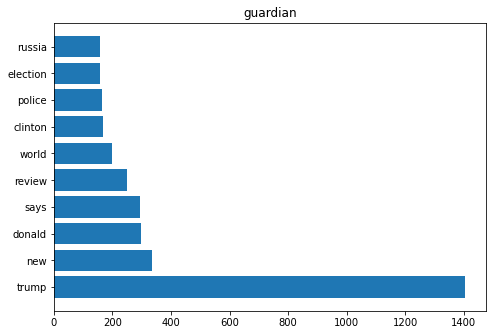

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

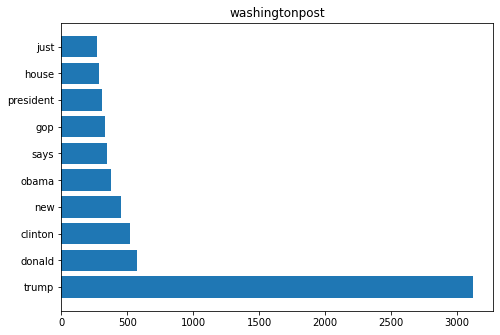

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

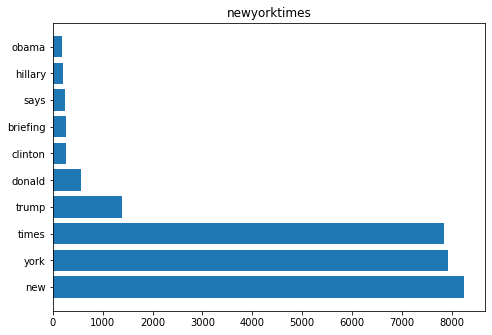

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

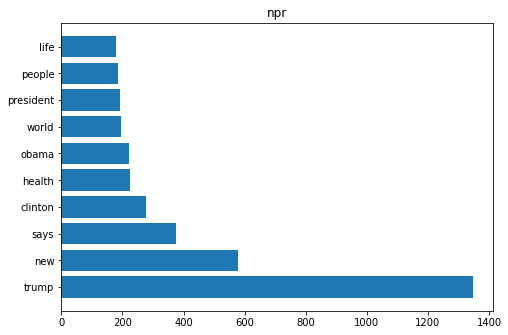

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

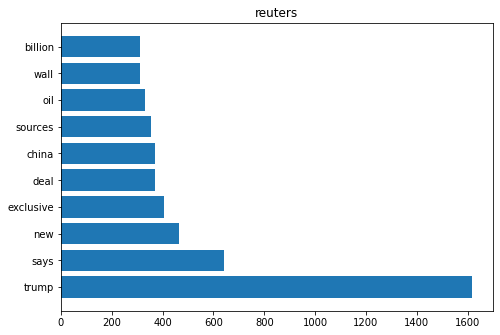

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

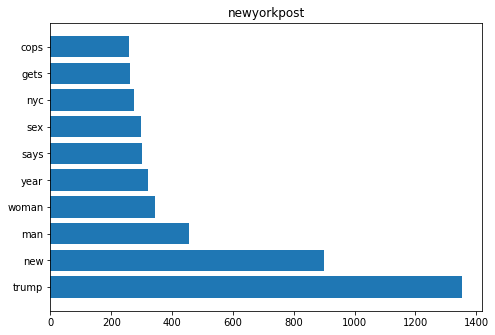

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

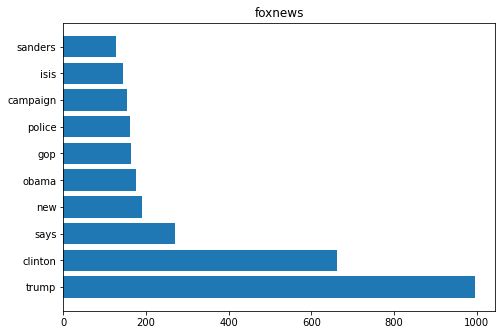

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

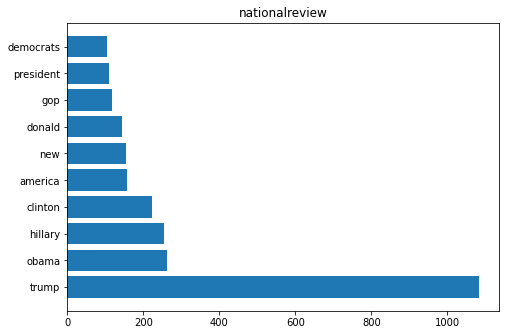

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

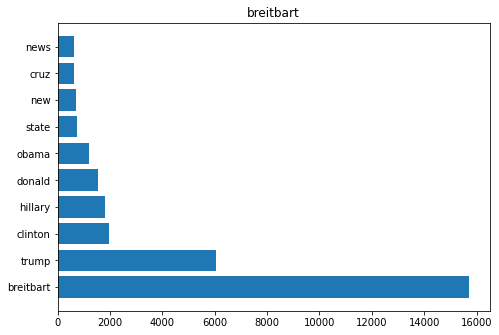

In [ ]:
plot_loop(data_dict)

In [ ]:
# creating our list of stop words
stop_words = text.ENGLISH_STOP_WORDS.union(['new', 'time', 'just', 'like', 'said', ''])

In [ ]:
# subsectioning our dfs, it was too big to run all at once
df1 = df[0:13000]
df2 = df[13001:]

In [ ]:
# creating our cvec and transforming our data
cvec1 = CountVectorizer(min_df = 10, stop_words = stop_words)
cvec1.fit(df1['content'])
X1 = cvec1.transform(df1['content'])
X_df1 = pd.DataFrame(X1.todense(), columns=cvec1.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# same but for the 2nd df
cvec2 = CountVectorizer(min_df = 10, stop_words = stop_words)
cvec2.fit(df2['content'])
X2 = cvec2.transform(df2['content'])
X_df2 = pd.DataFrame(X2.todense(), columns=cvec2.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

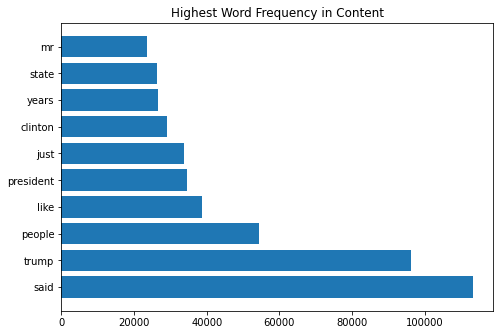

In [ ]:
# plotting word frequency in content
plt.figure(figsize=(5,5))


X_df = pd.concat([X_df1, X_df2])
top_df = X_df.sum().sort_values(ascending = False).head(10)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(top_df.index,top_df.values)
plt.title('Highest Word Frequency in Content')
plt.show()